# Customer Conversion Prediction
Problem Statement
You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective ways to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.
# Data
The historical sales data is available as a compressed file  here. Data Features: ● age (numeric) ● job : type of job ● marital : marital status ● educational_qual : education status ● call_type : contact communication type ● day: last contact day of the month (numeric) ● mon: last contact month of year ● dur: last contact duration, in seconds (numeric) ● num_calls: number of contacts performed during this campaign and for this client
● prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target): ● y - has the client subscribed to the insurance?
# Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. AUROC must be used as a metric to evaluate the performance of the models

# Importing necessary dependencies

In [1]:
import numpy as np         
import pandas as pd             
import statistics as st                   
                 
import matplotlib.pyplot as plt           
import seaborn as sns               

In [2]:
df=pd.read_csv('Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']]
tar_var = df[['y']]

# Cleaning and handling missing values

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

here in this dataset there are no missing values so there no need to get lost of any data so we can proceed further

# Data type correction

In [7]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#As the number of object data type columns is more it is important to know how each object data column is divided into categories. 
#Let's explore all the categorical columns and know into how many categories they are divided into.

In [8]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [9]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


In [10]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [13]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [14]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [15]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [16]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(45205, 11)

# Outliers

In [19]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


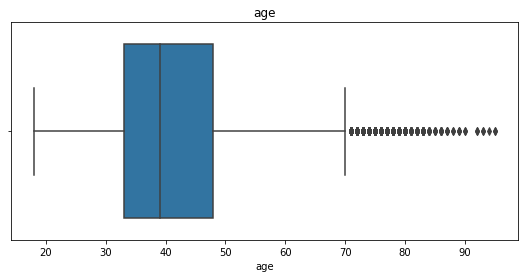

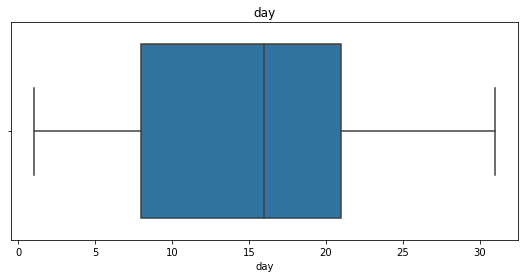

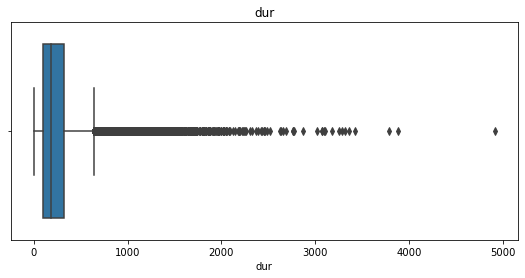

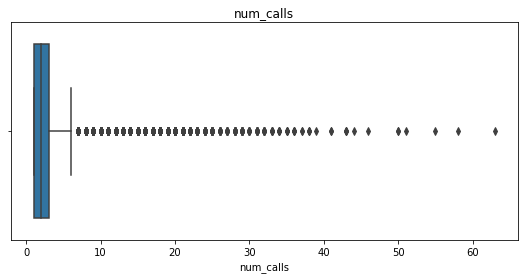

In [20]:

for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)


In [21]:
for i in num_var:

  iqr = df[i].quantile(0.75) - df[i].quantile(0.25)              
  upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
  upper_threshold, lower_threshold

  df[i] = df[i].clip(lower_threshold,upper_threshold)


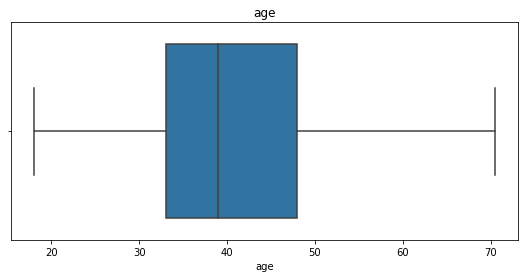

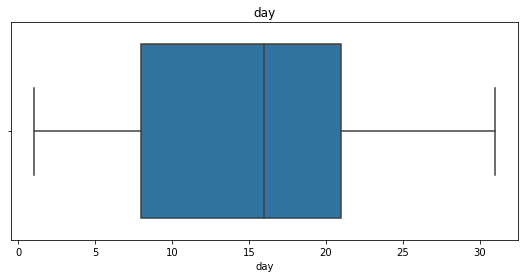

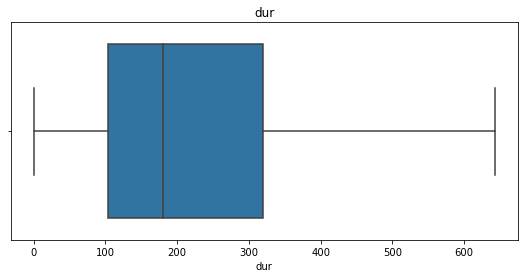

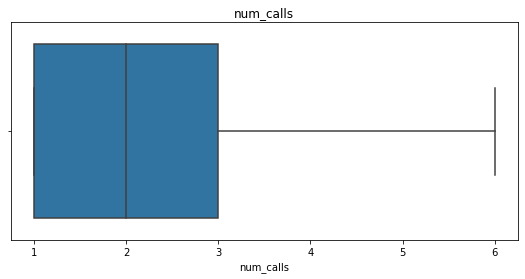

In [22]:
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

In [23]:
impute=['prev_outcome']
for column in impute:
  mode = df[column].mode()[0]
  df[column] = df[column].replace('unknown',mode)

In [24]:
impute=['job','education_qual']
for column in impute:
  mode = df[column].mode()[0]
  df[column] = df[column].replace('unknown',mode)

# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

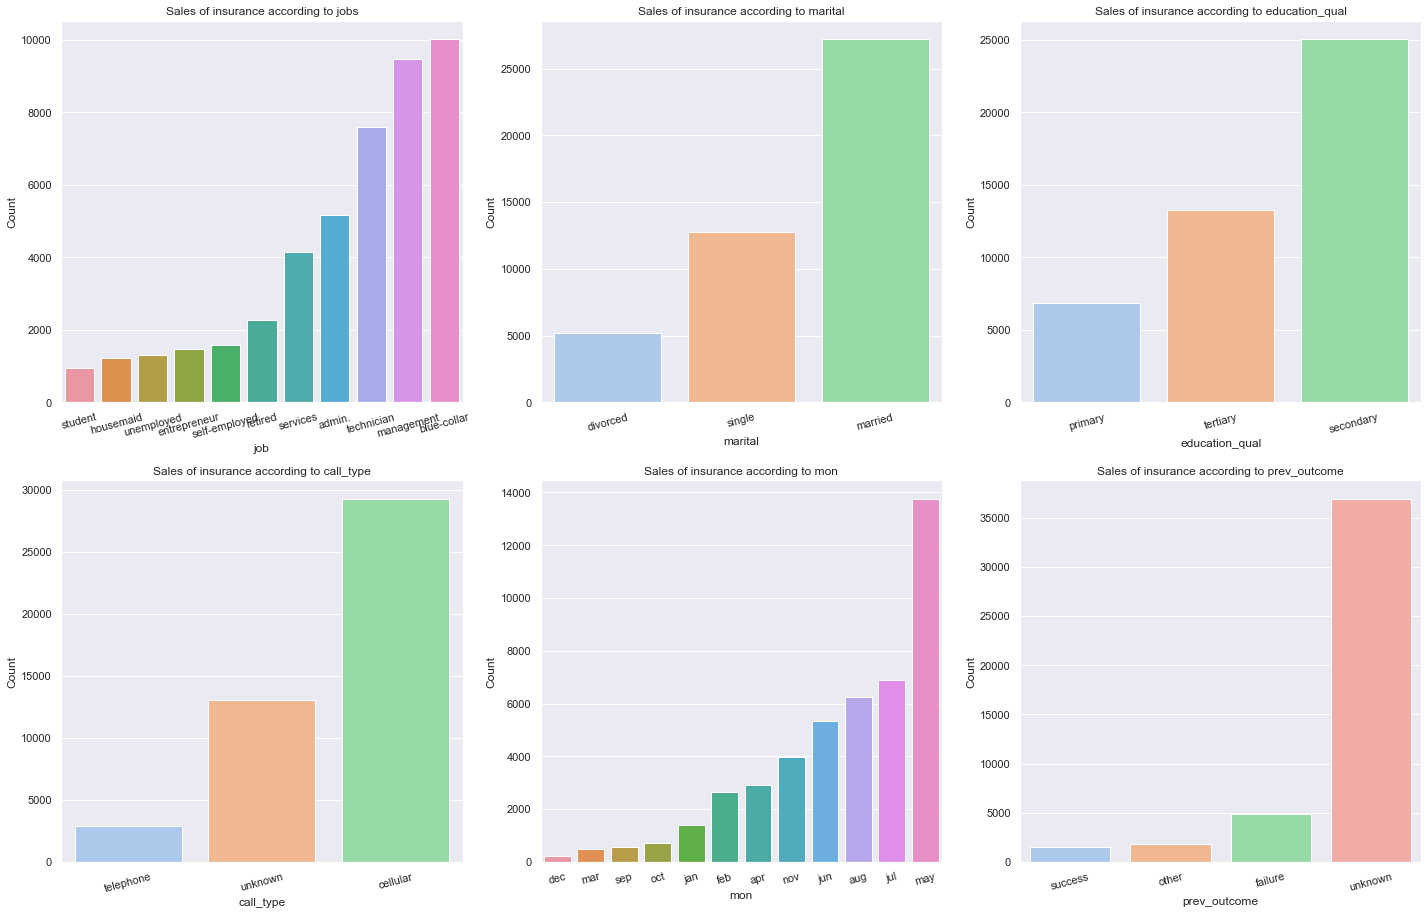

In [25]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431) 
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Sales of insurance according to jobs')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Sales of insurance according to marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Sales of insurance according to education_qual')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('Sales of insurance according to call_type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('Sales of insurance according to mon')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('Sales of insurance according to prev_outcome')

plt.tight_layout()

Interpretations :
    1.According to the column "job" the sales of insurance blue_collar jobs people are subscribed more.
    2.According to the column "marital" the sales of insurance married people are subscribed more.
    3.According to the column "education_qual" the secondary qualifiaction people are subscribed more.
    4.According to the column "call_type" the calls made through cellular calls are subsricbed more.
    5.According to the column "mon" the calls made on may month are subscribed more.
    6.According to the column "prev_outcome" the insurance subsrcibed success is less.

# Target variable analysis

In [26]:
df["y"] = df["y"].map({"yes" : 1, "no" : 0})

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


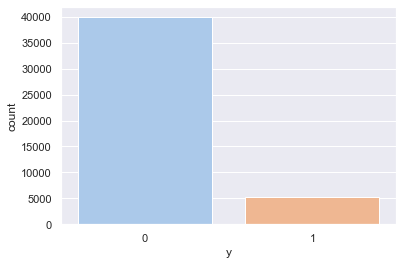

In [27]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
sns.countplot(x='y', data=df)
plt.show()

 We came to conclusion that given data is imbalanced data

# Plotting barplots for features vs target 

In [28]:
cat_var = df.select_dtypes(include=['object']).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


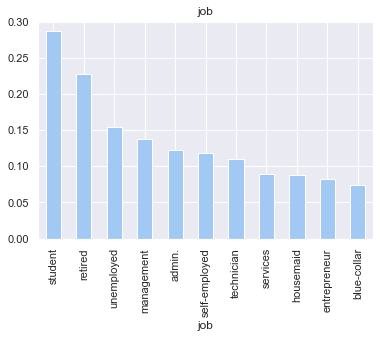

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.074067
Name: y, dtype: float64


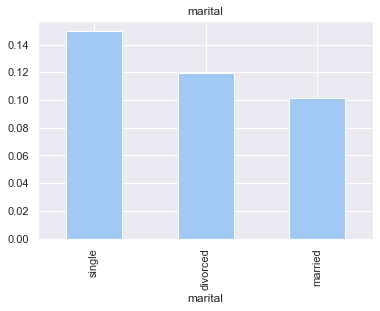

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: y, dtype: float64


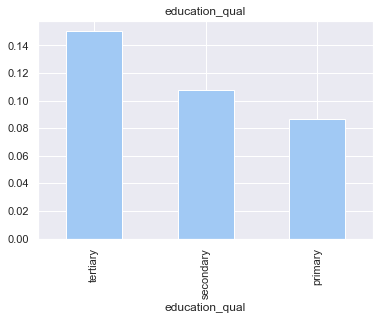

education_qual
tertiary     0.150086
secondary    0.107838
primary      0.086277
Name: y, dtype: float64


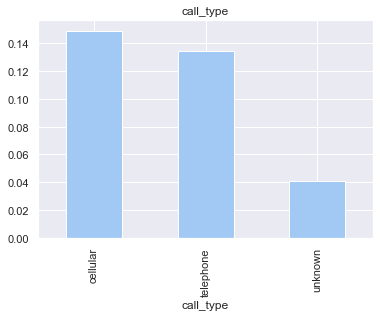

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y, dtype: float64


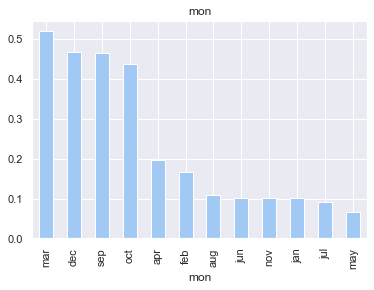

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: y, dtype: float64


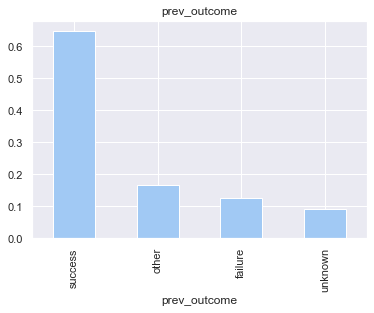

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: y, dtype: float64


In [29]:
for i in cat_var:
    df.groupby(i)['y'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i) 
    plt.show()  
    print(df.groupby(i)['y'].mean().sort_values(ascending=False))


for features of job and  marital,educational_qual there is a linear relationship and we will do label encoding,call_type,mon,prev_outcome there is a relationship but there is no linear relationship we will go for one hot encoding  

Correlation

In [30]:
corr_y = df.corr()['y']
print(corr_y)

age          0.018946
day         -0.028371
dur          0.390642
num_calls   -0.084067
y            1.000000
Name: y, dtype: float64


In [31]:
corr_y = corr_y[:-1].abs().sort_values(ascending = False)
corr_y

dur          0.390642
num_calls    0.084067
day          0.028371
age          0.018946
Name: y, dtype: float64

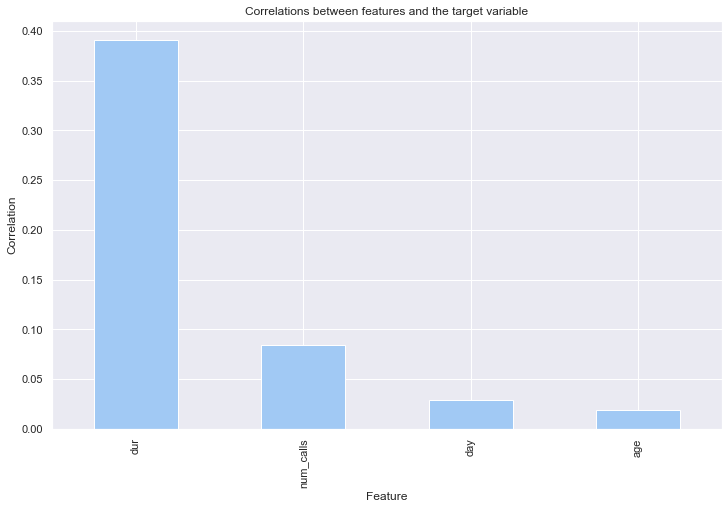

In [32]:
plt.figure(figsize=(12,7.5))
corr_y.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations between features and the target variable')
plt.show()

We can say that from the above graph call duration of the call is highly correlated with the target variable.If duration of the call is more, there are higher chances that the client is showing interest in the term deposit.

# Encoding

In [33]:
df["job"] = df["job"].map({'blue-collar': 0,'entrepreneur': 1, 'housemaid':2, 'services' :3, 'technician' :4, 'self-employed':5, 'admin.' :6, 'management' :7, 'unemployed':8, 'retired':9, 'student':10 })
df["marital"] = df["marital"].map({'married':0, 'divorced':1, 'single':2 })
df["education_qual"] = df["education_qual"].map({'primary':0, 'secondary':1, 'tertiary':2 })

#one hot encoding
df = pd.get_dummies(df,columns = ["call_type"])
df = pd.get_dummies(df,columns = ["mon"])
df = pd.get_dummies(df,columns = ["prev_outcome"])


In [34]:
df.head()

,age,job,marital,education_qual,day,dur,num_calls,y,call_type_cellular,call_type_telephone,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7,0,2,5,261.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,4,2,1,5,151.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,1,0,1,5,76.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,0,1,5,92.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,2,1,5,198.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Splitting the data

In [35]:
def split(dataframe):
    x = dataframe.drop('y',axis=1)
    y = dataframe['y']
    return x,y

In [36]:
x, y = split(df)

In [37]:
x

,age,job,marital,education_qual,day,dur,num_calls,call_type_cellular,call_type_telephone,call_type_unknown,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7,0,2,5,261.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,4,2,1,5,151.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,33.0,1,0,1,5,76.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,0,1,5,92.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,2,1,5,198.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,2,17,643.0,3.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,70.5,9,1,0,17,456.0,2.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,70.5,9,0,1,17,643.0,5.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57.0,0,0,1,17,508.0,4.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [39]:
import imblearn
from imblearn.over_sampling import SMOTE
x_sm, y_sm = SMOTE().fit_resample(x,y)
y_sm.value_counts()

0    39916
1    39916
Name: y, dtype: int64

Now the dataset is balanced

# Models

# Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler                              
sv = StandardScaler()                                               
X_train = sv.fit_transform(X_train)                           
X_test = sv.transform(X_test)      


In [63]:
from sklearn.linear_model import LogisticRegression              
from sklearn.metrics import accuracy_score,roc_auc_score          
model=LogisticRegression()  
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
model1=model.predict(X_test)
print(accuracy_score(model1,y_test))
print(roc_auc_score(model1,y_test))

0.8961398075434134
0.7686622464134426


# SVM

In [67]:
from sklearn.svm import SVC                                                              
classifier = SVC()                    
classifier.fit(X_train, y_train)                                                

SVC()

In [68]:
model2=classifier.predict(X_test)                                                 
print(accuracy_score(model2,y_test))                           
print(roc_auc_score(model2,y_test))              

0.8985731666851012
0.7963704428476686


# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier(random_state=0, splitter='best')
model.fit(X_train, y_train)
D_pred = model.predict(X_test)
print(accuracy_score(D_pred,y_test))
print(roc_auc_score(D_pred,y_test))

0.8685986063488552
0.6896662386939405


# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
model_pred = KNN.predict(X_test)
print(accuracy_score(model_pred,y_test))
print(roc_auc_score(model_pred,y_test))

0.8939276628691516
0.7541811372759903


# Here most important feature is duration

Based on the results obtained from the evaluation of the four classification models (Logistic Regression, KNN, SVM, Decision Tree Classifier) on the given historical data,Support Vector machine gives Accuracy Score of 89% and the highest AUROC score of 0.79.